In [1]:
import torch
from torch.nn import functional as f

import matplotlib.pyplot as plt
import numpy as np

from time import perf_counter
np.set_printoptions(precision=2)

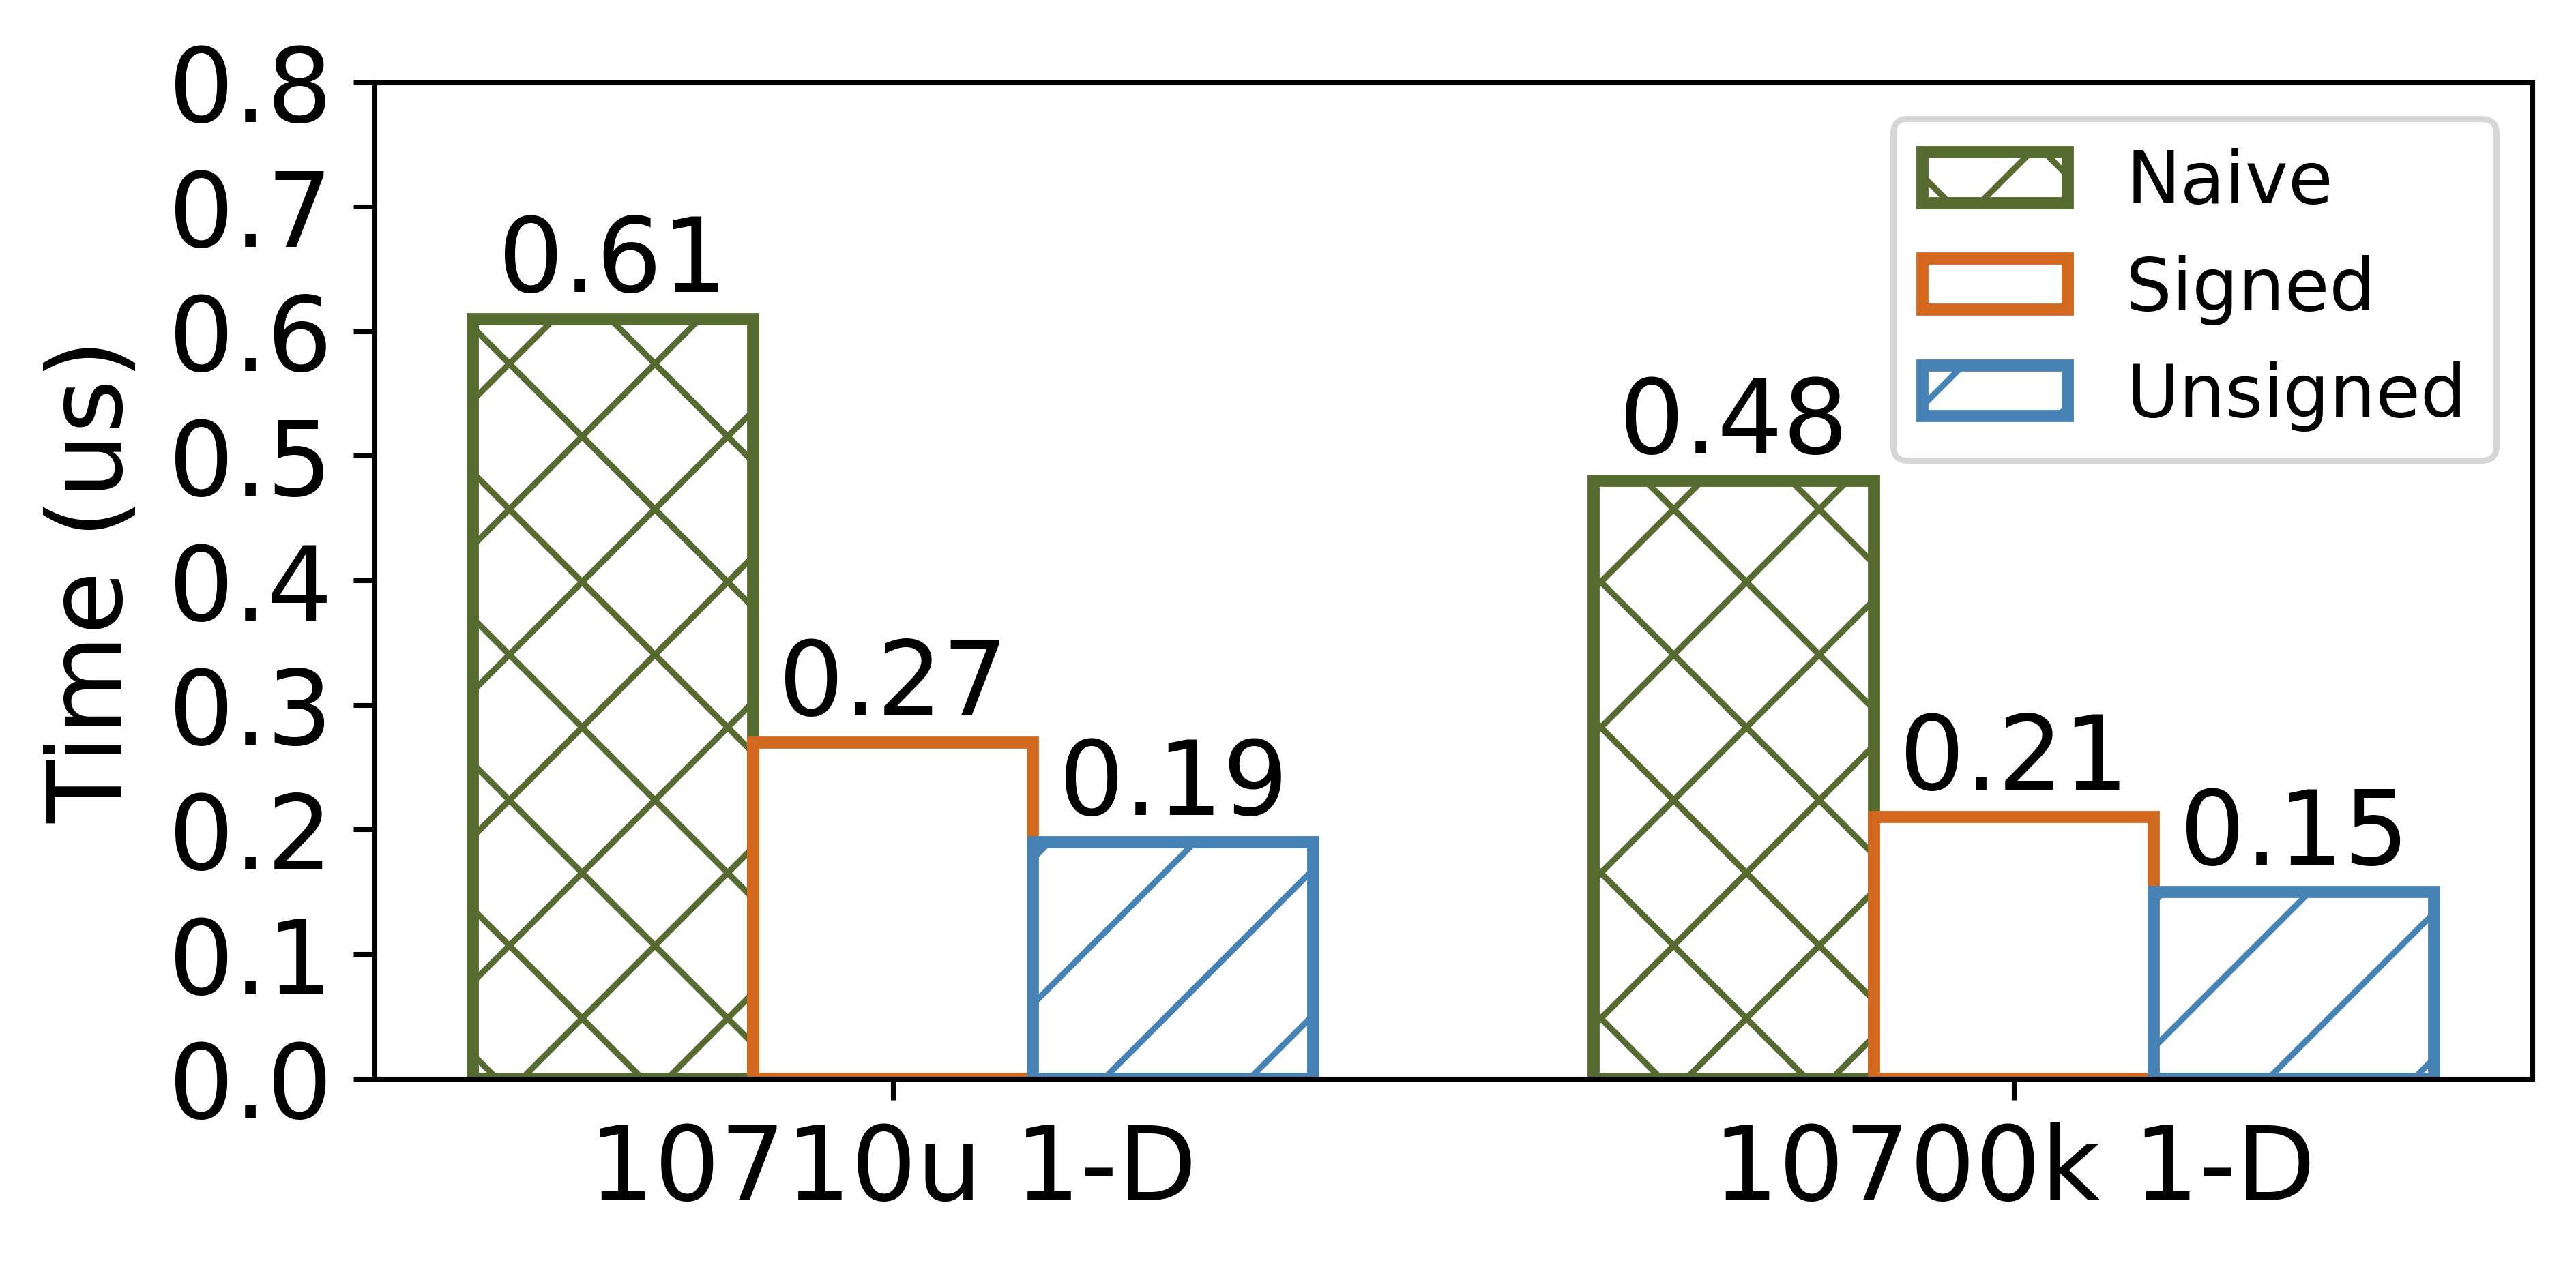

In [2]:
labels = ['10710u 1-D', '10700k 1-D']

# 1d: f = 100000, k = 3, p4q4

y_1d_naive = np.array([614623, 480616])
y_1d_signed = np.array([279284, 216787])
y_1d_unsigned = np.array([197410, 151556])

# 2d: c_in = 64, c_out = 36, h = 10, w = 20, p4q4

y_2d_naive = np.array([20297279, 15523451])
y_2d_signed = np.array([7404469, 5555853])
y_2d_unsigned = np.array([6485651, 4873112])

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 3), dpi=640)
rects1 = ax.bar(x - width, y_1d_naive//10000/100, width, edgecolor='darkolivegreen', color='w', hatch = 'x', linewidth=2, label='Naive')
rects2 = ax.bar(x, y_1d_signed//10000/100, width, edgecolor='chocolate', color='w', hatch = '', linewidth=2, label='Signed')
rects3 = ax.bar(x + width, y_1d_unsigned//10000/100, width, edgecolor='steelblue', color='w', hatch = '/', linewidth=2, label='Unsigned')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (us)', fontsize=17)
# ax.set_title('1-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
plt.yticks(fontsize=17)
ax.set_ylim([0, 0.8])
ax.legend(fontsize=12)

ax.bar_label(rects1, padding=1, fontsize=17)
ax.bar_label(rects2, padding=1, fontsize=17)
ax.bar_label(rects3, padding=1, fontsize=17)

fig.tight_layout()

plt.show()

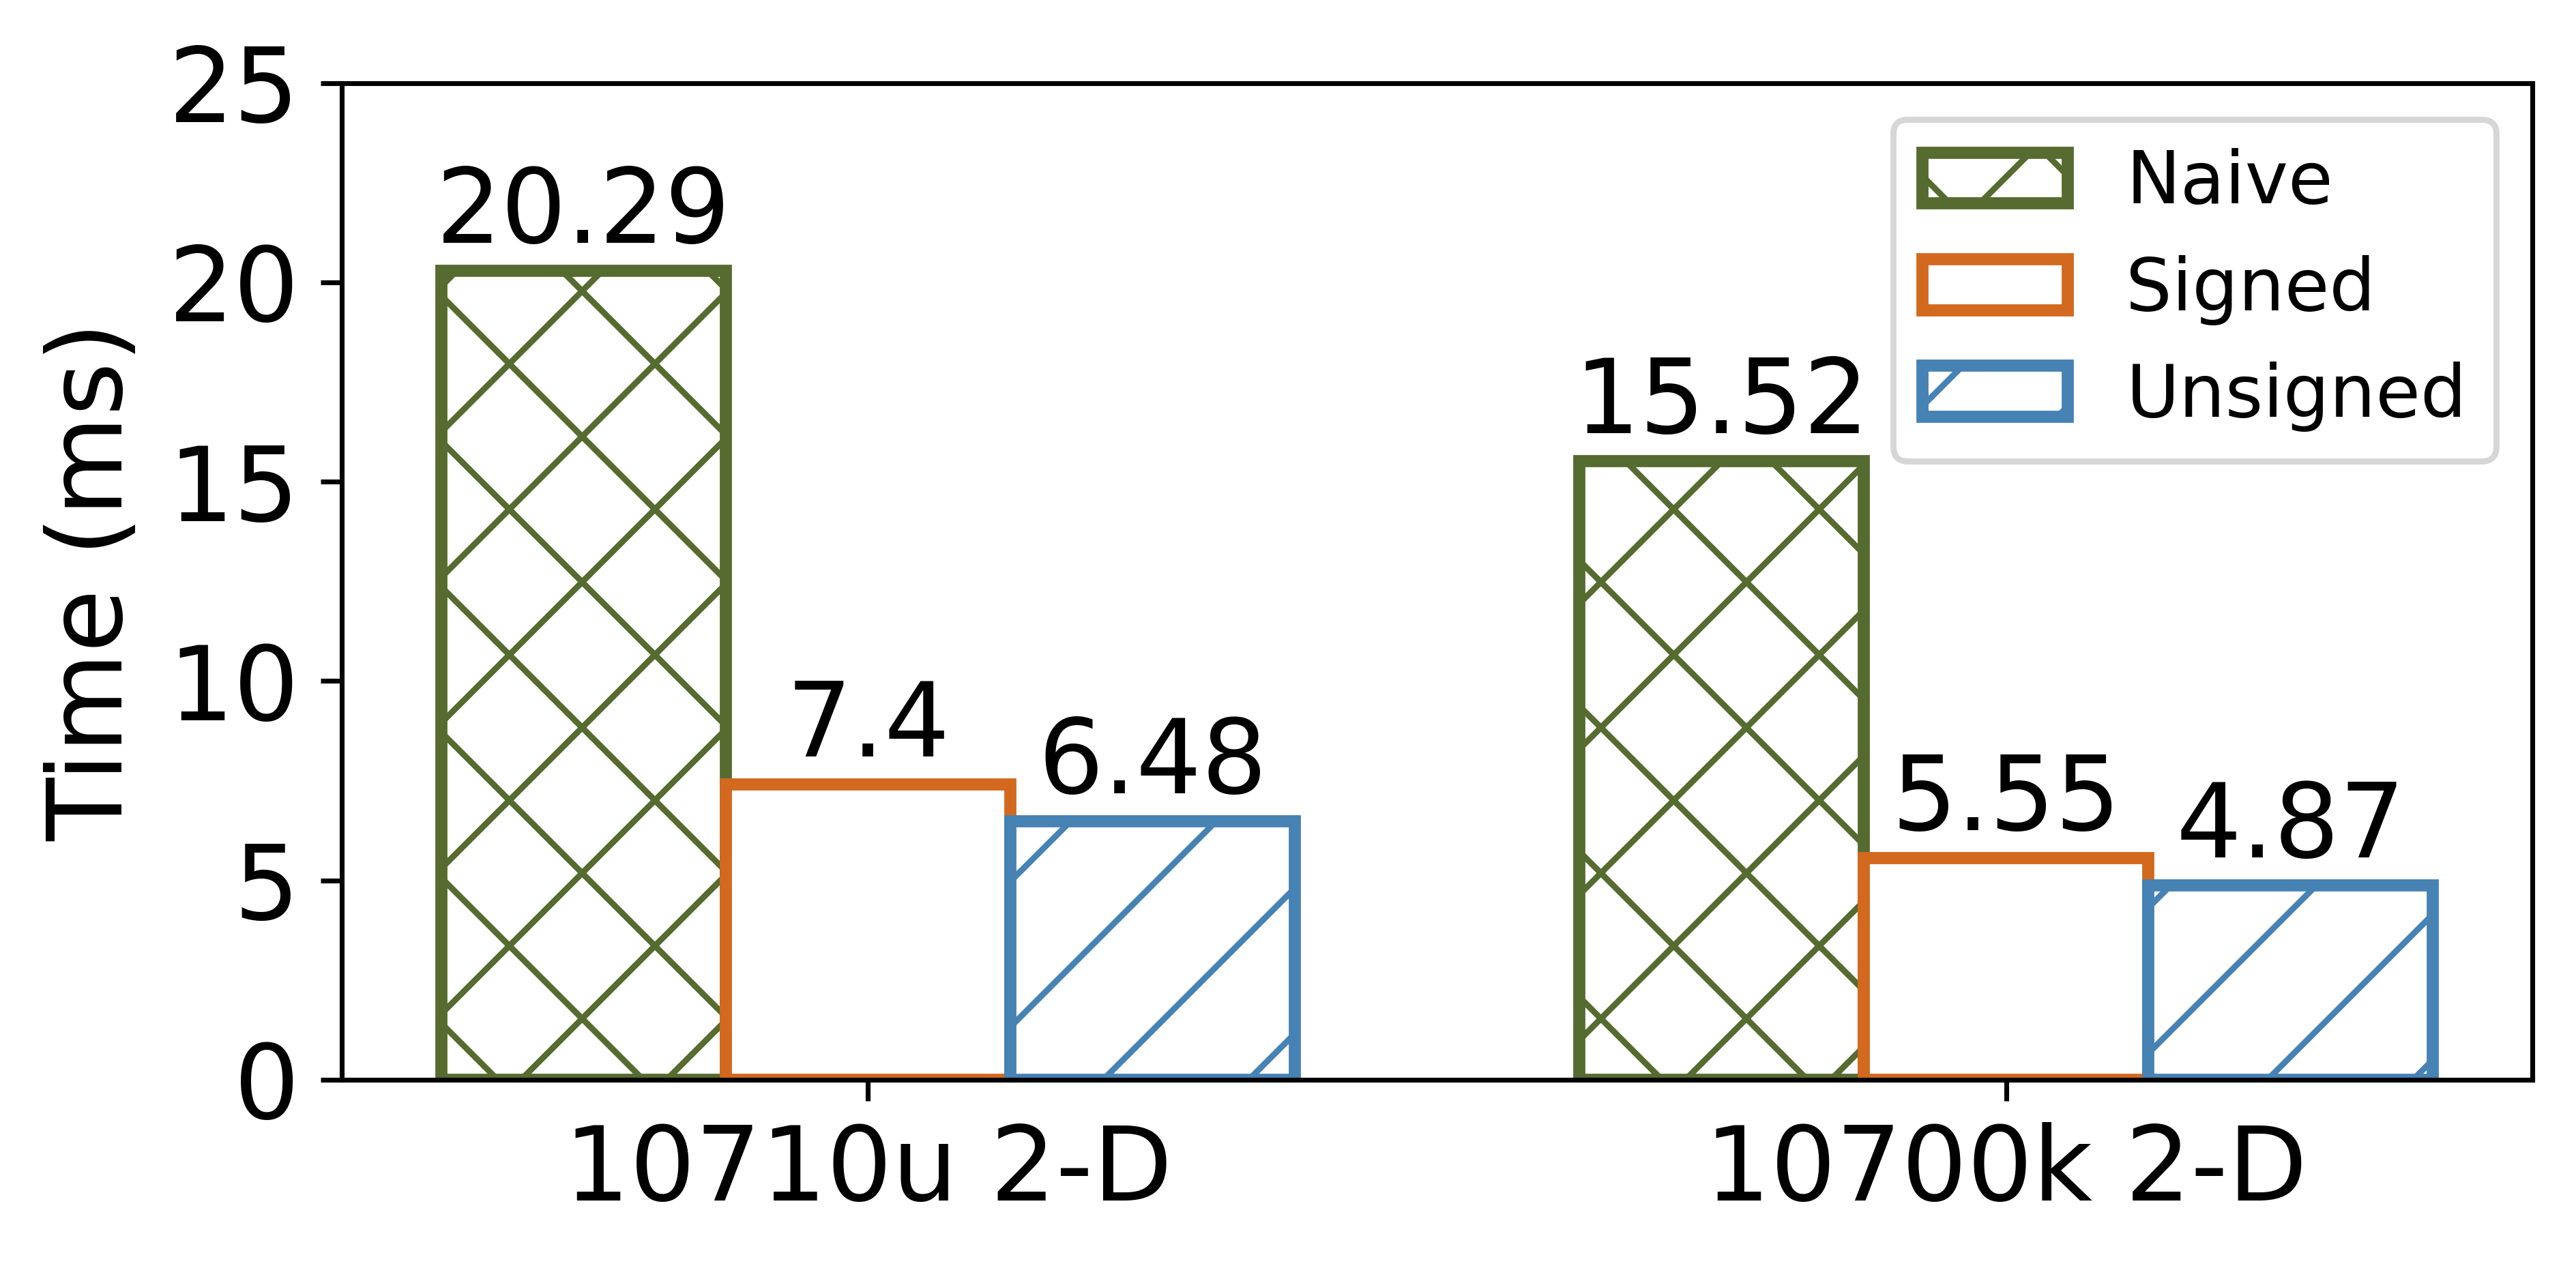

In [3]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=640)
labels = ['10710u 2-D', '10700k 2-D']

rects1 = ax.bar(x - width, y_2d_naive//10000/100, width, edgecolor='darkolivegreen', color='w', hatch = 'x', linewidth=2, label='Naive')
rects2 = ax.bar(x, y_2d_signed//10000/100, width, edgecolor='chocolate', color='w', hatch = '', linewidth=2, label='Signed')
rects3 = ax.bar(x + width, y_2d_unsigned//10000/100, width, edgecolor='steelblue', color='w', hatch = '/', linewidth=2, label='Unsigned')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (ms)', fontsize=17)
# ax.set_title('2-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
plt.yticks(fontsize=17)
ax.set_ylim([0, 25])
ax.legend(fontsize=12)

ax.bar_label(rects1, padding=1, fontsize=17)
ax.bar_label(rects2, padding=1, fontsize=17)
ax.bar_label(rects3, padding=1, fontsize=17)

fig.tight_layout()

plt.show()

[1.09 1.09 1.13 1.54 1.63 2.04 2.45 7.79]
[1.75 2.08 2.32 3.15 3.25 4.38 5.6  7.79]


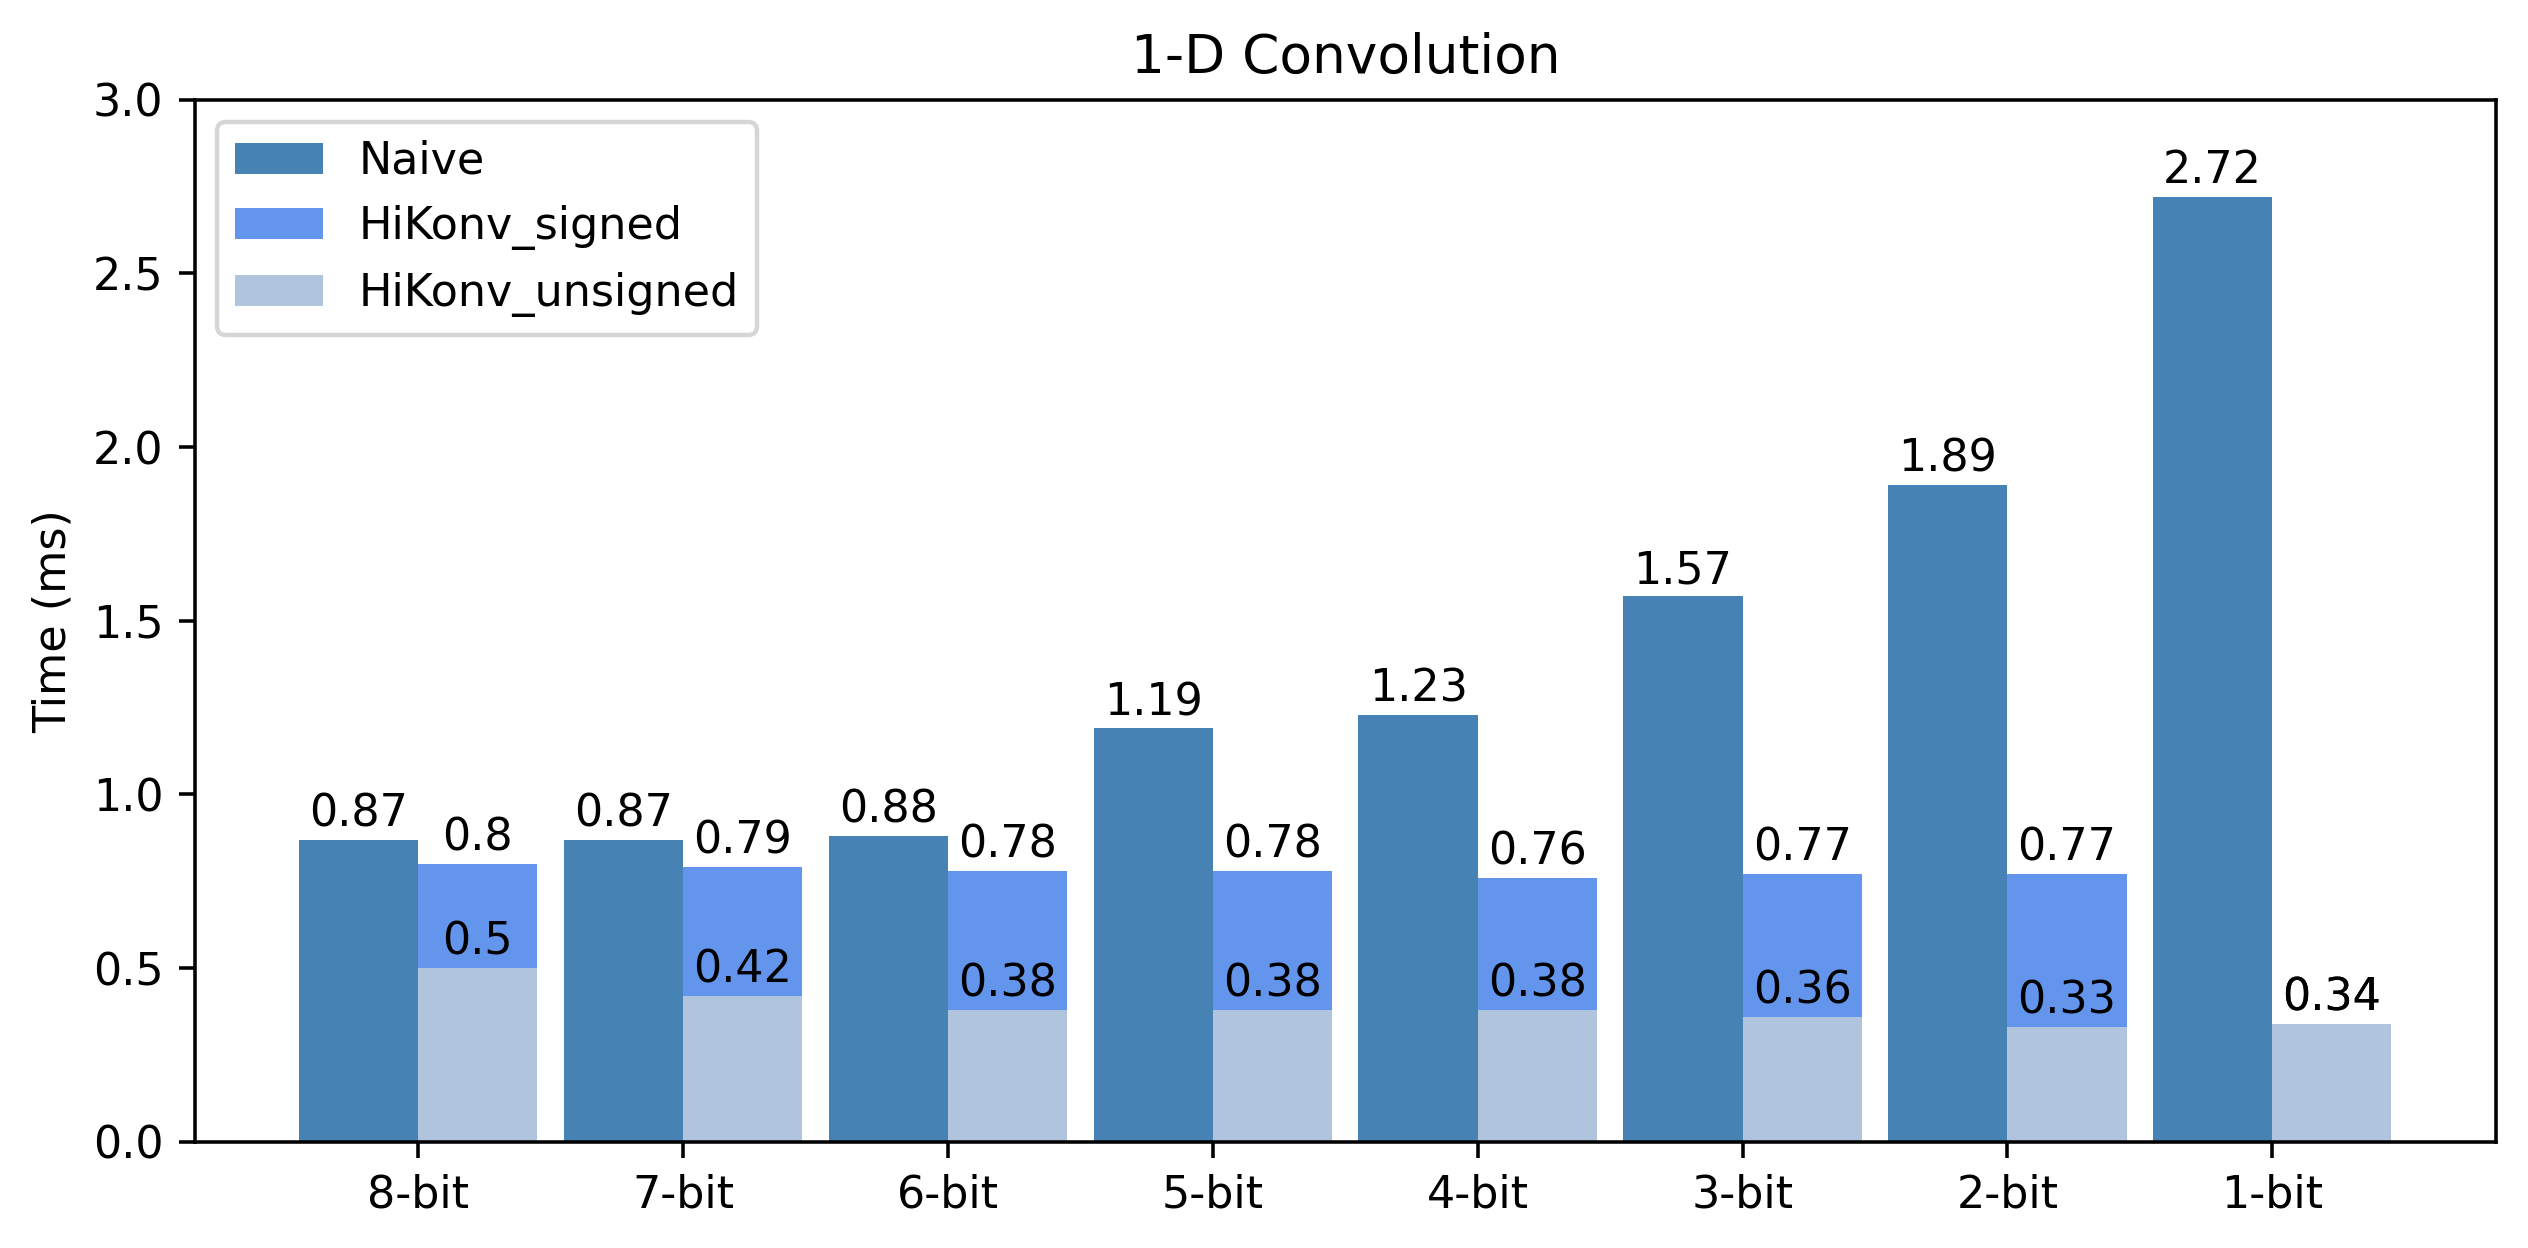

In [4]:
labels = ['8-bit', '7-bit', '6-bit', '5-bit', '4-bit', '3-bit', '2-bit', '1-bit']

y_1d_naive = np.array([878134, 873280, 888110, 1198895, 1237593, 1579601, 1896703, 2723729])
y_1d_signed = np.array([804960, 798461, 789250, 780535, 761258, 772987, 773813, 349722])
y_1d_unsigned = np.array([502980, 420705, 383206, 380323, 380745, 360496, 338632, 349722])
# y_1d_split = 40047*(np.array([8.5, 8.55, 8.5, 8.1, 8, 7.7, 7.5, 7.3]) + 0.1*(np.random.rand(8)-0.5))*0.1

y_speed_signed = y_1d_naive/y_1d_signed
y_speed_unsigned = y_1d_naive/y_1d_unsigned
print(y_speed_signed)
print(y_speed_unsigned)

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4), dpi=320)
rects1 = ax.bar(x - width/2, y_1d_naive//10000/100, width, color="steelblue", label='Naive')
rects2 = ax.bar(x + width/2, y_1d_signed//10000/100, width, color="cornflowerblue", label='HiKonv_signed')
rects3 = ax.bar(x + width/2, y_1d_unsigned//10000/100, width, color="lightsteelblue", label='HiKonv_unsigned')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (ms)')
ax.set_title('1-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 3])
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)
ax.bar_label(rects3, padding=1)

fig.tight_layout()

plt.show()

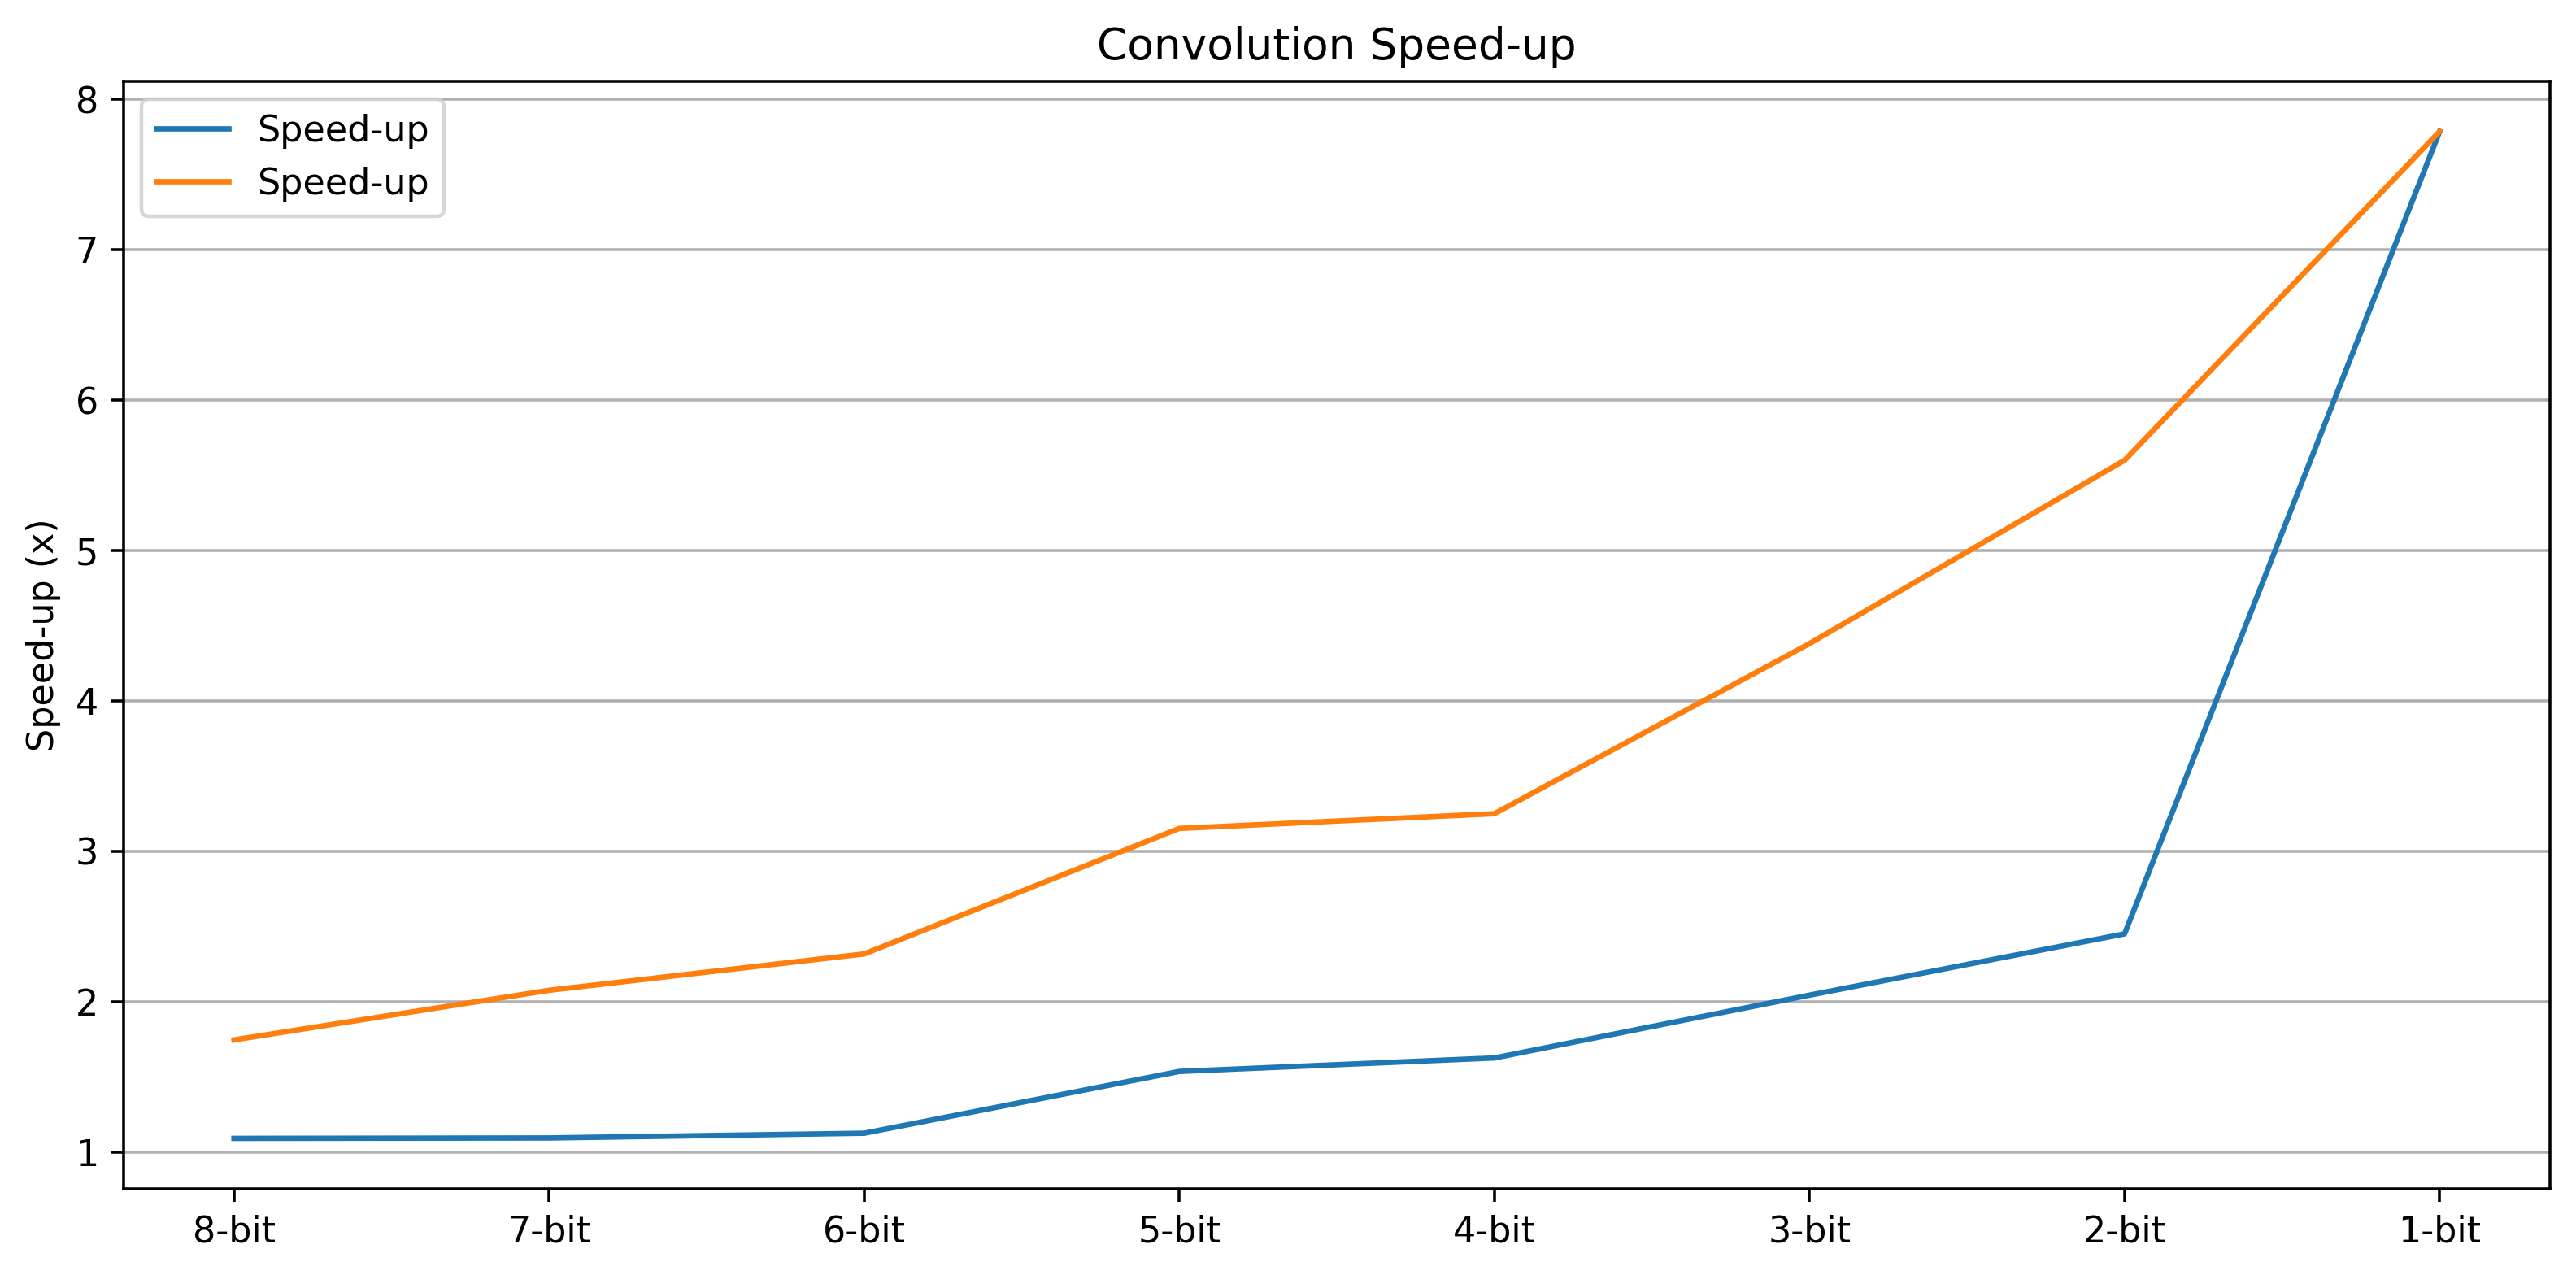

In [5]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=320)

rects1 = ax.plot(x, y_speed_signed, label='Speed-up')
rects2 = ax.plot(x, y_speed_unsigned, label='Speed-up')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Speed-up (x)')
ax.set_title('Convolution Speed-up')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.yaxis.grid(True)

fig.tight_layout()

plt.show()

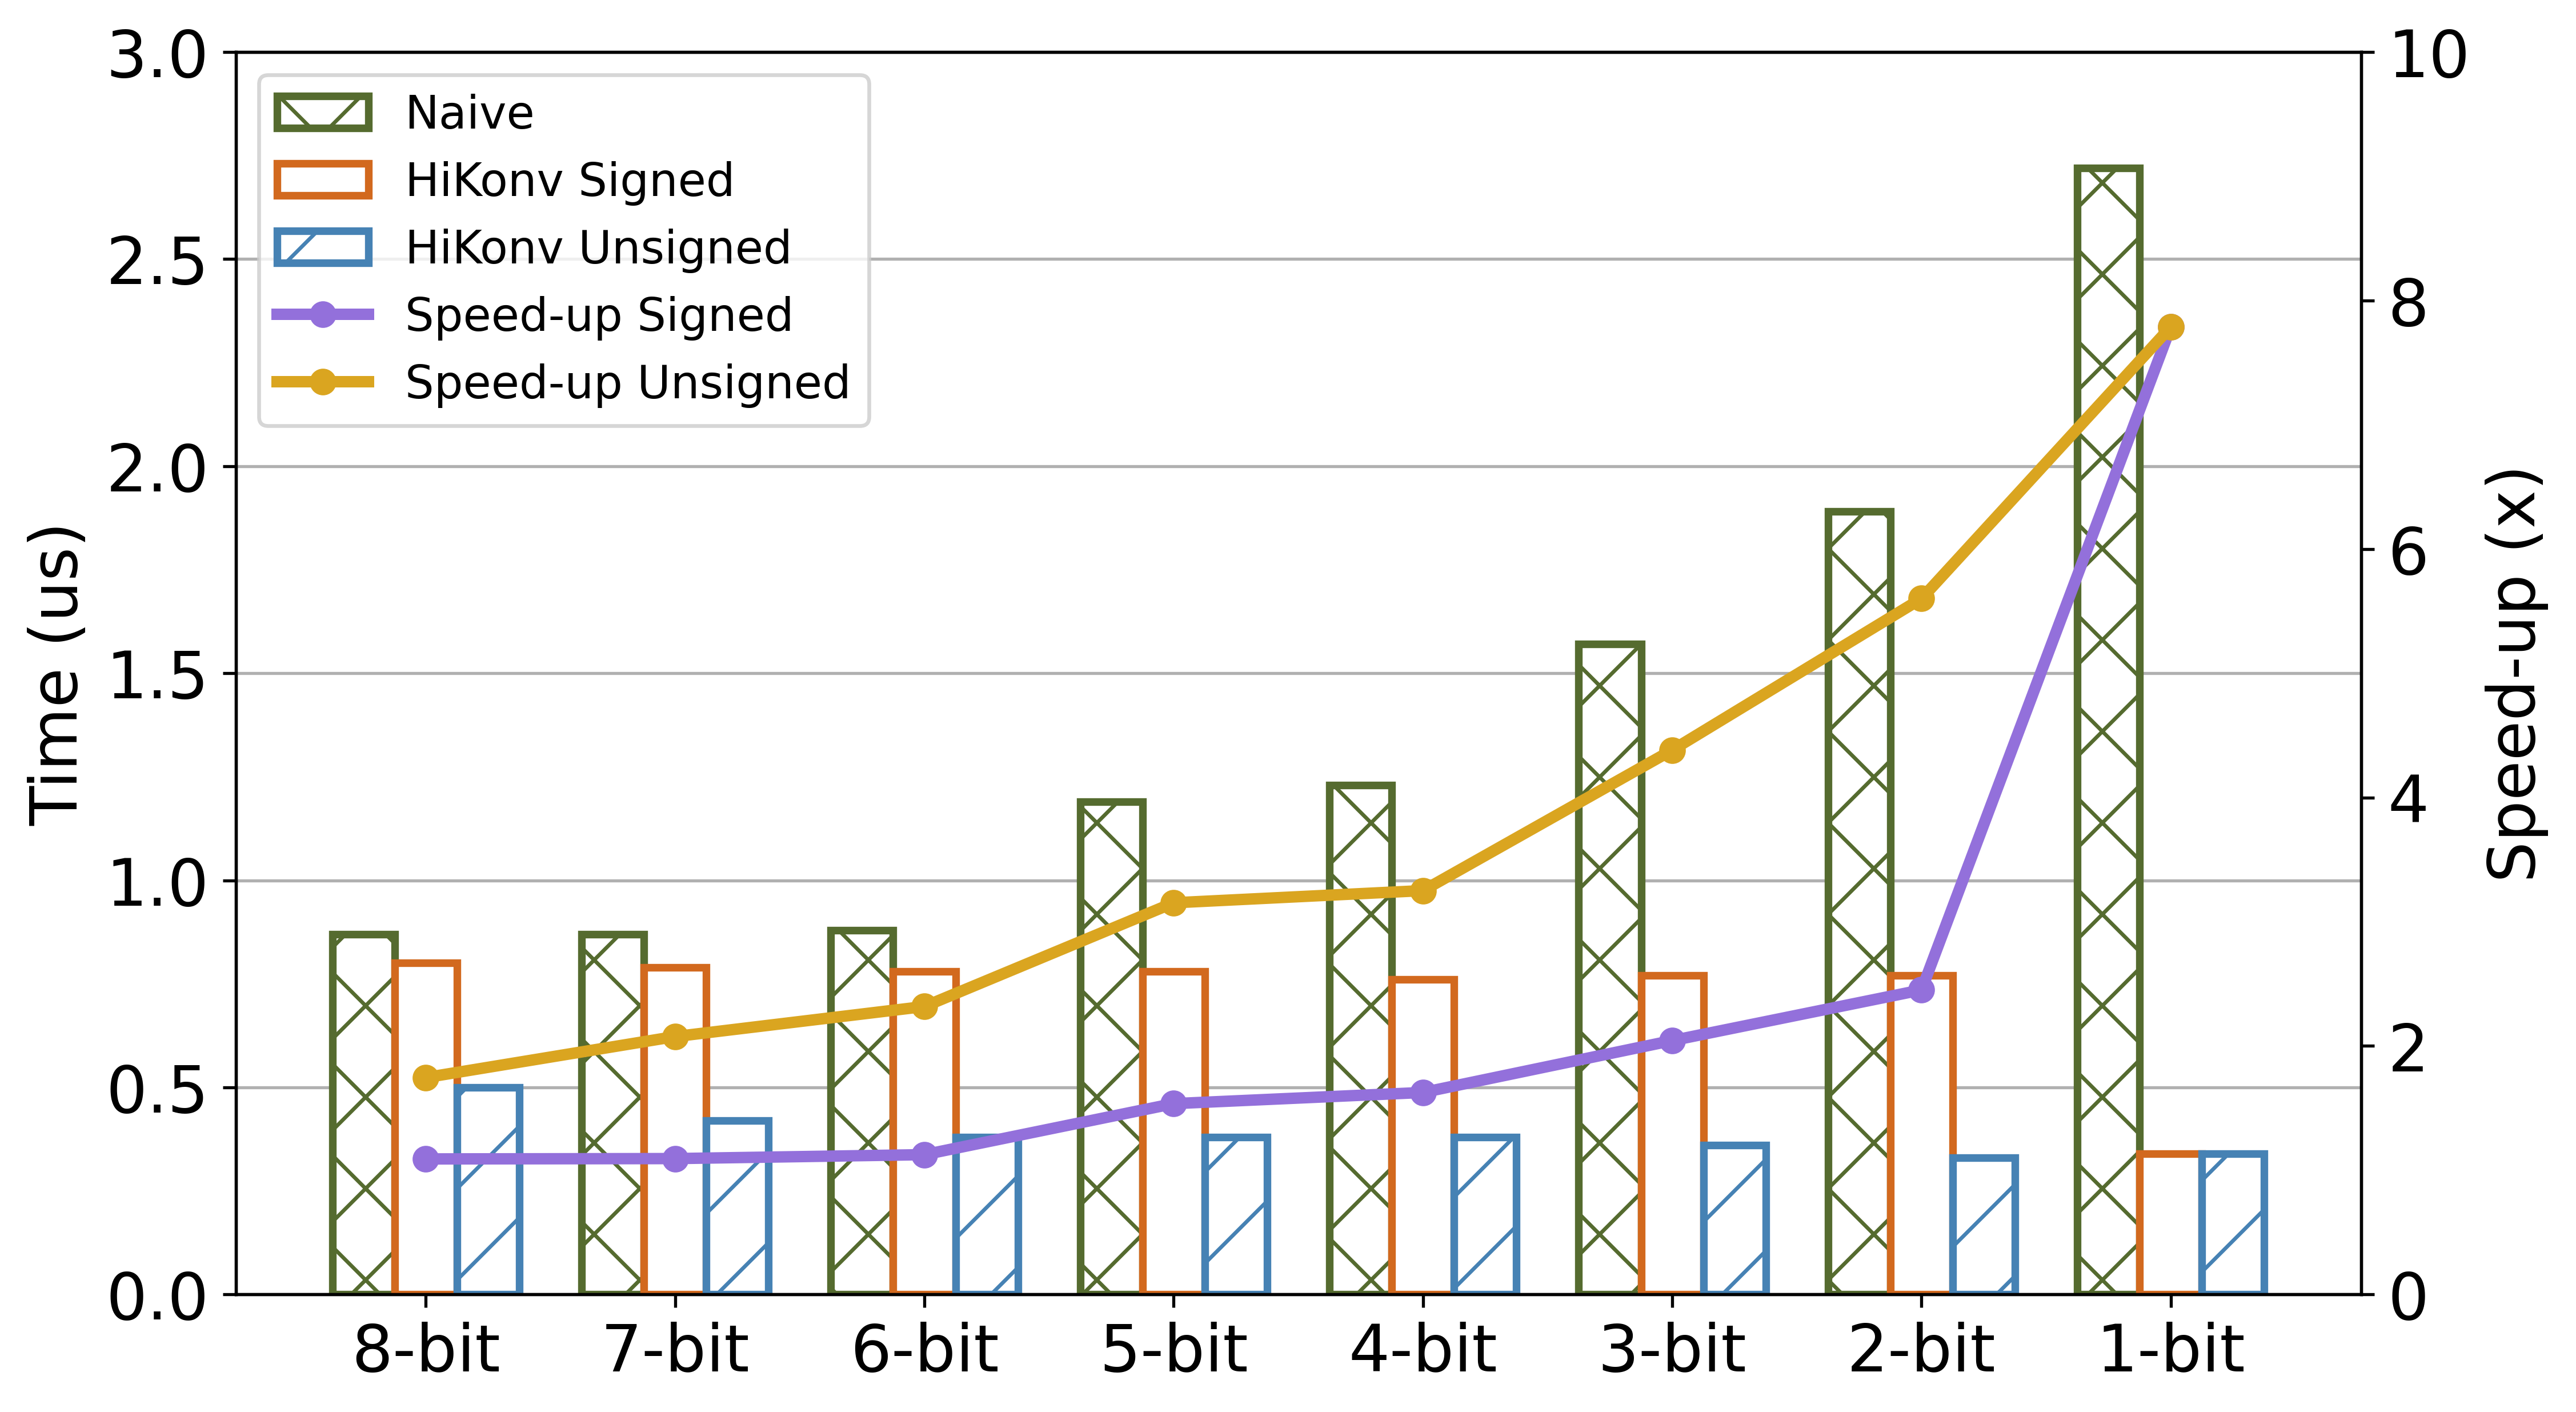

In [8]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=480)

twin1 = ax.twinx()
width = 0.25
p1 = ax.bar(x - width, y_1d_naive//10000/100, width, edgecolor='darkolivegreen', color='w', hatch = 'x', linewidth=2, label='Naive', zorder=2)
p2 = ax.bar(x, y_1d_signed//10000/100, width, edgecolor='chocolate', color='w', hatch = '', linewidth=2, label='HiKonv Signed', zorder=2)
p3 = ax.bar(x + width, y_1d_unsigned//10000/100, width, edgecolor='steelblue', color='w', hatch = '/', linewidth=2, label='HiKonv Unsigned', zorder=2)
p4, = twin1.plot(x, y_speed_signed, "o-", color="mediumpurple", label='Speed-up Signed', zorder=3, linewidth=3)
p5, = twin1.plot(x, y_speed_unsigned, "o-", color="goldenrod", label='Speed-up Unsigned', zorder=3, linewidth=3)
ax.set_ylabel('Time (us)', fontsize=17)
# ax.set_title('1-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.set_ylim([0, 3])

# ax.bar_label(p1, padding=2, zorder=20)
# ax.bar_label(p2, padding=2, zorder=20)

twin1.set_ylabel('Speed-up (x)', fontsize=17)
# twin1.set_title('Convolution Speed-up')
twin1.set_xticks(x)
twin1.set_xticklabels(labels, fontsize=17)
twin1.set_ylim([0, 10])
ax.yaxis.grid(True, zorder=0)

ax.legend(handles=[p1, p2, p3, p4, p5], fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=17)
plt.yticks(fontsize=17)
plt.show()